# Kaggledan dataset toping(missing qiymatlari va turli xil turdagi data typelari bo’lsin) va Klib  orqali Klibsiz model yarating ikkala natijalarni solishtiring jadval orqali(tabulate)


In [68]:
import pandas as pd
df = pd.read_csv(r'D:\2025 lessons\AI+ML course amaliyot\Datasets\Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


# With KLIB

In [69]:
import klib

GridSpec(6, 6)

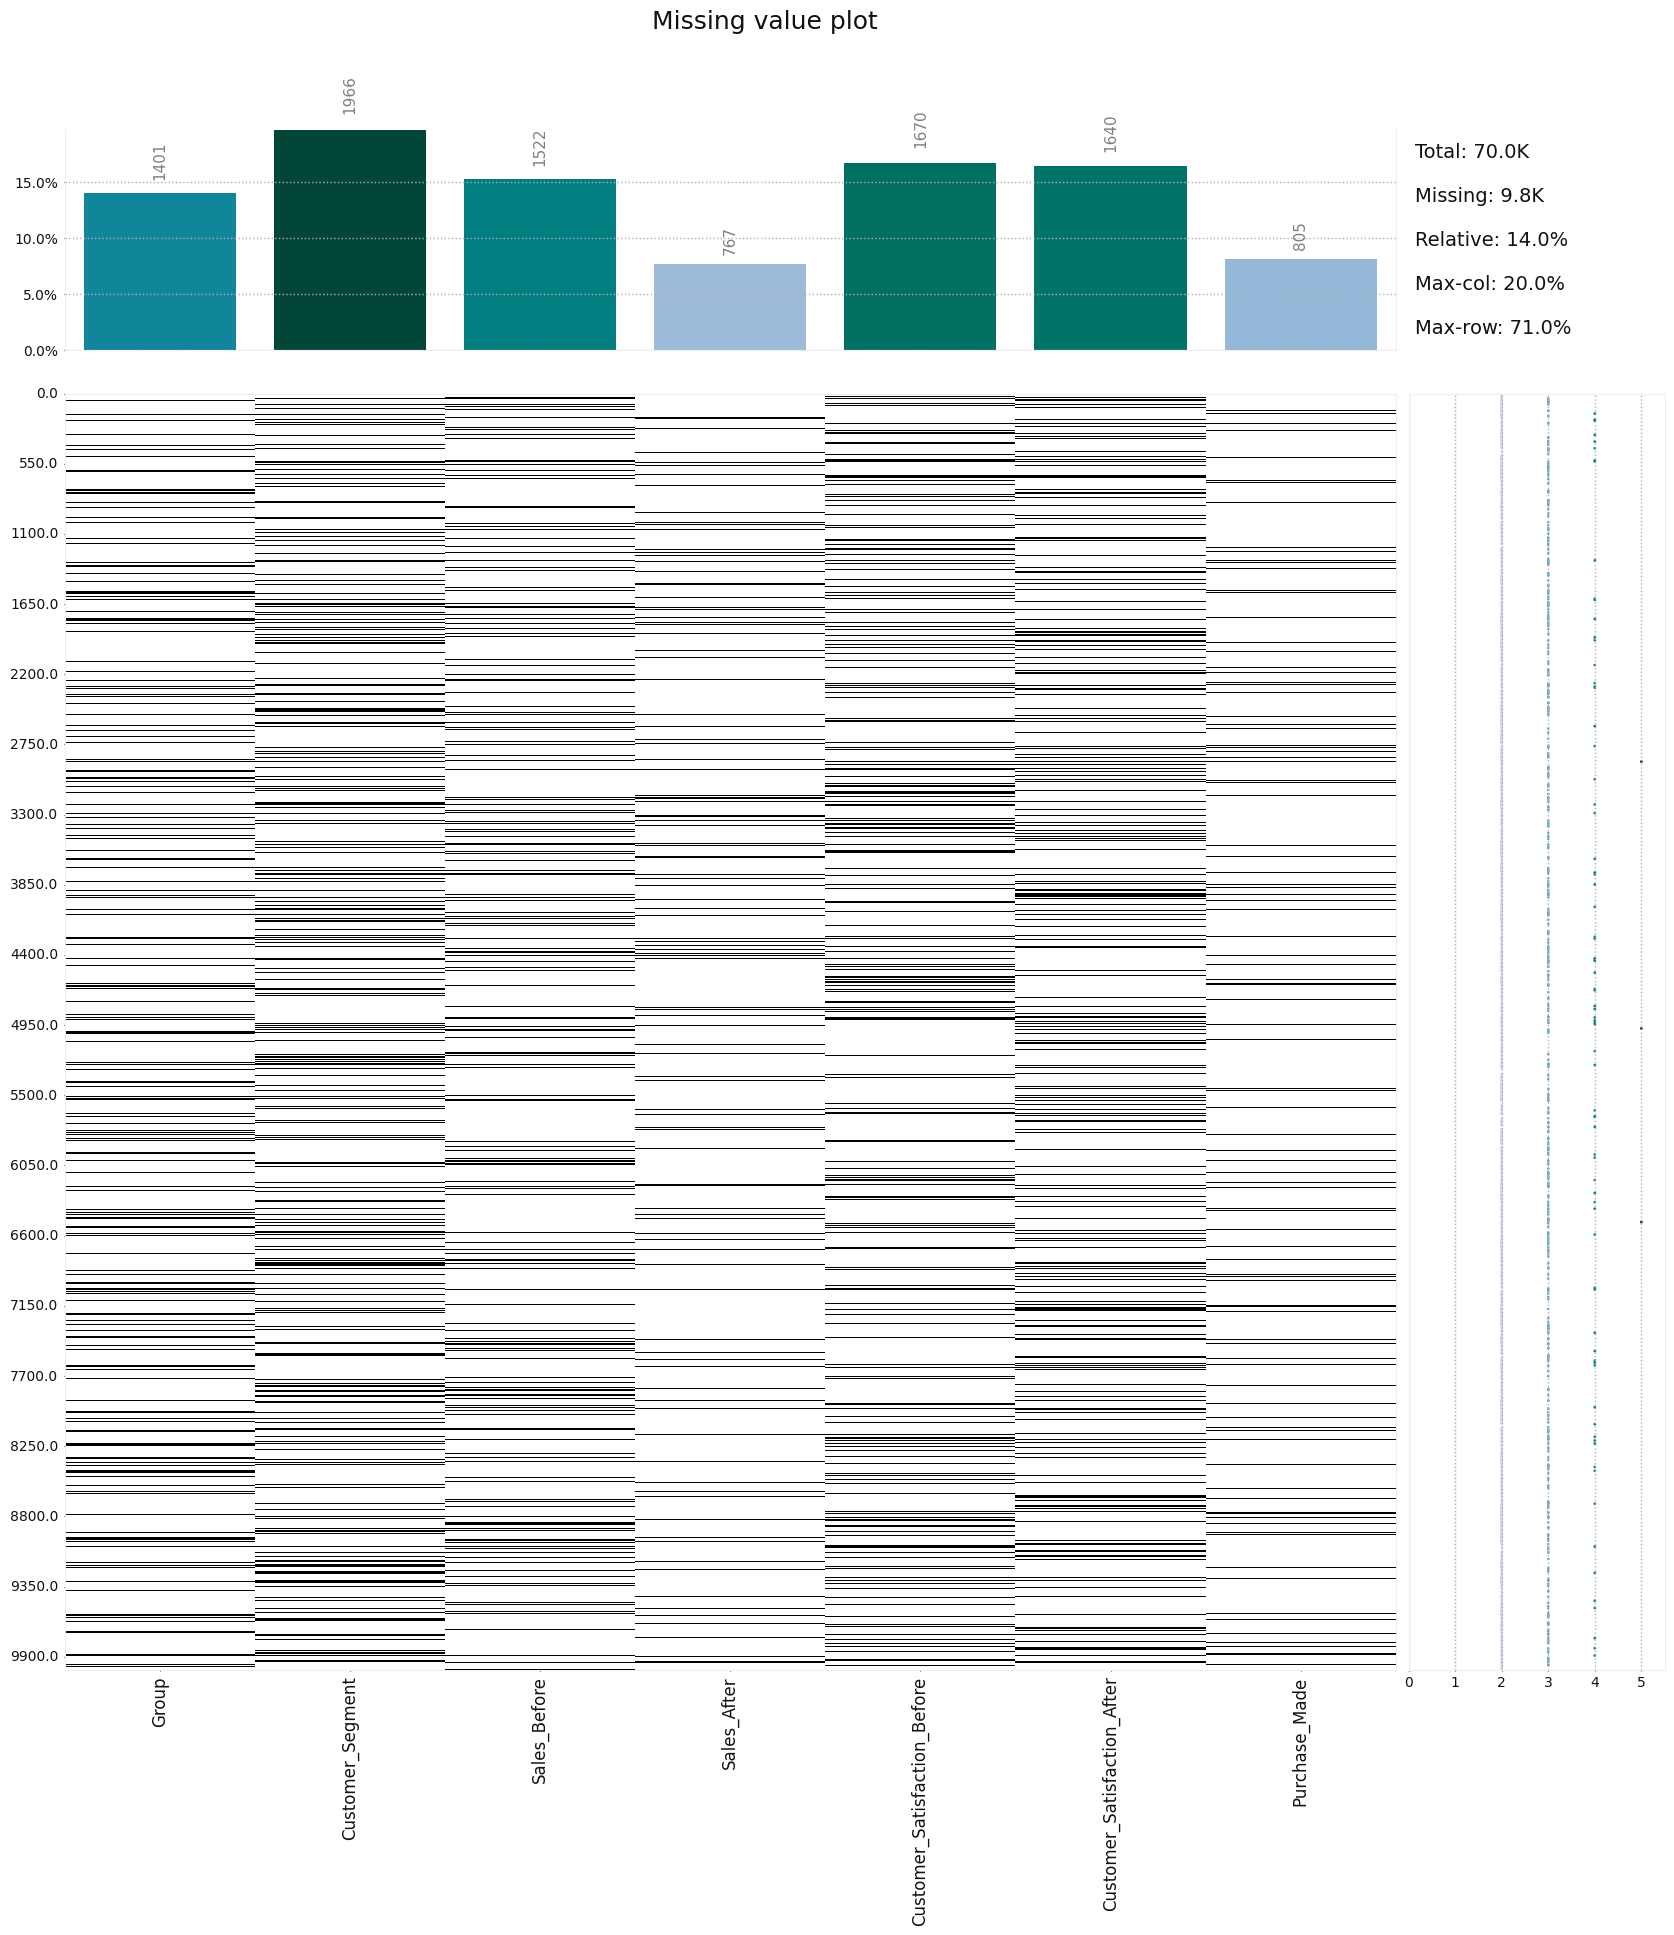

In [70]:
klib.missingval_plot(df) # * missing value larni kurish

In [71]:
df_klib= df.copy(deep=True)
df_klib=klib.data_cleaning(df_klib)
df_klib.head()



Shape of cleaned data: (10000, 7) - Remaining NAs: 9771


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.35 MB (-66.04%)



,group,customer_segment,sales_before,sales_after,customer_satisfaction_before,customer_satisfaction_after,purchase_made
0,Control,High Value,240.548355,300.007568,74.684769,NaN,No
1,Treatment,High Value,246.862122,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978088,179.330460,98.780731,100.000000,No
3,Control,Medium Value,192.126709,229.278030,49.333767,39.811840,Yes
4,NaN,High Value,229.685623,NaN,83.974854,87.738594,Yes


In [72]:
df_klib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   group                         8599 non-null   category
 1   customer_segment              8034 non-null   category
 2   sales_before                  8478 non-null   float32 
 3   sales_after                   9233 non-null   float32 
 4   customer_satisfaction_before  8330 non-null   float32 
 5   customer_satisfaction_after   8360 non-null   float32 
 6   purchase_made                 9195 non-null   category
dtypes: category(3), float32(4)
memory usage: 186.0 KB


In [73]:
for index in df_klib.columns[df_klib.isnull().any()]:           # ! fill  missing value
    if df_klib[index].dtypes =='category':
        df_klib[index] = df_klib[index].fillna(df_klib[index].mode()[0])
    else: 
        df_klib[index] = df_klib[index].fillna(df_klib[index].median())
df_klib.head()

,group,customer_segment,sales_before,sales_after,customer_satisfaction_before,customer_satisfaction_after,purchase_made
0,Control,High Value,240.548355,300.007568,74.684769,73.844589,No
1,Treatment,High Value,246.862122,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978088,179.330460,98.780731,100.000000,No
3,Control,Medium Value,192.126709,229.278030,49.333767,39.811840,Yes
4,Control,High Value,229.685623,273.129181,83.974854,87.738594,Yes


# Encoding

In [74]:
df_klib['group'].value_counts()

group
Control      5701
Treatment    4299
Name: count, dtype: int64

In [75]:
df_klib['customer_segment'].value_counts()

customer_segment
Low Value       4665
Medium Value    2697
High Value      2638
Name: count, dtype: int64

In [76]:
df_klib['purchase_made'].value_counts()



purchase_made
Yes    5472
No     4528
Name: count, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
# df_klib = pd.DataFrame(df_klib)               
for col in  df_klib.columns :
  if df_klib[col].dtypes == 'category':
    if df_klib[col].nunique() <= 2:
      df_klib[col] = LabelEncoder().fit_transform(df_klib[col])
    else:
      # df_klib = pd.get_dummies(df_klib[col],drop_first=True, dtype=int)
      df_klib[col] = OneHotEncoder().fit_transform(df_klib[col])

df_klib.head(10)

,customer_segment,sales_before,sales_after,customer_satisfaction_before,customer_satisfaction_after,group_Control,group_Treatment,purchase_made_No,purchase_made_Yes
0,0,6348,5643,4984,4179,1,0,1,0
1,0,6605,8017,7728,7031,0,1,0,1
2,0,1661,1009,7645,7031,1,0,1,0
3,2,3551,2612,877,184,1,0,0,1
4,0,5815,4562,6220,5814,1,0,0,1
5,1,880,2201,2381,3580,0,1,1,0
6,0,3529,2354,6877,5543,1,0,0,1
7,1,2506,2012,3776,3371,1,0,0,1
8,0,4543,3398,7394,5506,1,0,0,1
9,0,6088,7381,4676,3775,0,1,1,0


In [87]:
df_klib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   customer_segment              10000 non-null  int64
 1   sales_before                  10000 non-null  int64
 2   sales_after                   10000 non-null  int64
 3   customer_satisfaction_before  10000 non-null  int64
 4   customer_satisfaction_after   10000 non-null  int64
 5   group_Control                 10000 non-null  int64
 6   group_Treatment               10000 non-null  int64
 7   purchase_made_No              10000 non-null  int64
 8   purchase_made_Yes             10000 non-null  int64
dtypes: int64(9)
memory usage: 703.3 KB


# Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
df_klib = StandardScaler().fit_transform(df_klib)
# df_klib = pd.DataFrame(df_klib)


ValueError: could not convert string to float: 'Control'

# Train-Validation-Test Split


In [ ]:
from sklearn.model_selection import train_test_split
x = df_klib.drop(columns=['purchase_made']) 
y = df_klib['purchase_made']
y.info()

KeyError: "['purchase_made'] not found in axis"